In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [157]:
df1 = pd.read_excel('/content/ev_sales_data.xlsx', sheet_name='Sheet1')
df1

,Category,17-18,18-19,19-20,20-21,21-22,22-23,23-24,Grand Total
0,E-2 Wheelers,2005,28007,26834,44803,252642,728054,944126,2026471
1,E-3 Wheelers,91970,116031,143051,90898,172543,401882,632485,1648860
2,E-4 Wheelers,1204,1885,2377,5154,18622,47499,90432,167173
3,E-Buses,19,66,434,373,1194,1984,3693,7763
4,Grand Total,95198,145989,172696,141228,445001,1179419,1670736,3850267


In [158]:
import altair as alt
import pandas as pd

# Reshape the dataframe to long format for easier plotting
df1_melted = df1.melt(id_vars=['Category'],
                     value_vars=['17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24'],
                     var_name='Financial Year',
                     value_name='Vehicles Sold')

# Create the chart
chart = alt.Chart(df1_melted).mark_line().encode(
    x='Financial Year:O',  # Ordinal scale for financial years
    y='Vehicles Sold:Q',   # Quantitative scale for vehicles sold
    color='Category:N',    # Nominal scale for categories
    tooltip=['Category', 'Financial Year', 'Vehicles Sold']  # Show tooltip on hover
).properties(
    width=600,
    height=400,
    title='Vehicles Sold by Category Over Time'
)

# Add points to highlight each data point
points = chart.mark_point().encode(
    opacity=alt.value(1)  # Set opacity of points
)

# Combine line chart and points
chart + points


alt.LayerChart(...)

In [159]:
df2 = pd.read_excel('/content/ev_sales_data.xlsx', sheet_name='Sheet2')
df2

,Category,Amount( in Crores)
0,E-2 Wheelers,2464.27
1,E-3 Wheelers,351.21
2,E-4 Wheelers,114.65
3,E-Buses,687.93


<Figure size 1000x500 with 0 Axes>

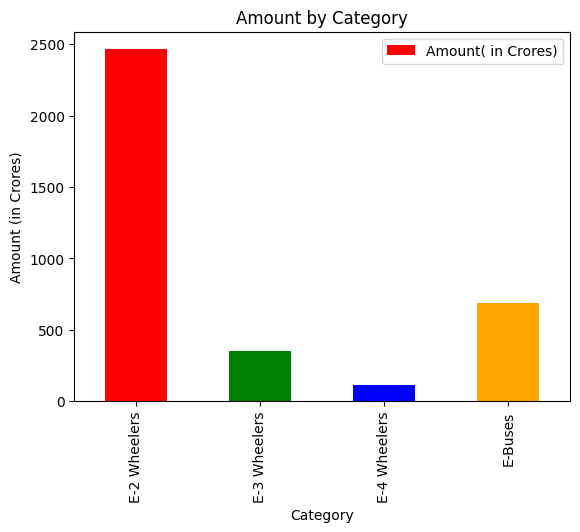

In [160]:
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 5))  # Set figure size
df2.plot(x='Category', y='Amount( in Crores)', kind='bar', color=['red', 'green', 'blue', 'orange'])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Amount (in Crores)')
plt.title('Amount by Category')

# Show the plot
plt.show()


In [161]:
df3 = pd.read_excel('/content/ev_sales_data.xlsx', sheet_name='Sheet3')
df3

,Company,2019-20,2020-21,2021-22,2022-23,2023-2024
0,OLA ELECTRIC,0,0,0,152779,326443
1,TVS,0,838,9740,82109,182959
2,ATHER,2905,4401,19981,76939,108872
3,BAJAJ,0,1470,7114,32805,106990
4,AMPERE,2518,6095,25516,87392,55057
5,OKINAWA,10544,7129,47926,95939,20873
6,HERO ELECTRIC,7865,15956,69235,89874,12094
7,OKAYA EV,0,0,0,13175,14035
8,REVOLT,1063,1793,7641,12932,7342
9,OTHERS,1939,3251,24865,52973,79622


In [162]:

import altair as alt

# Reshape the data for plotting
df_melted = df3.melt(id_vars=['Company'],
                     value_vars=['2019-20', '2020-21', '2021-22', '2022-23', '2023-2024'],
                     var_name='Financial Year',
                     value_name='No of Vehicles')

# Create the line chart with highlighted points
chart = alt.Chart(df_melted).mark_line().encode(
    x='Financial Year',
    y='No of Vehicles',
    color='Company'
).properties(
    width=600,
    height=400
).interactive()

# Add points to highlight the data
chart = chart + alt.Chart(df_melted).mark_point(filled=True, size=60).encode(
    x='Financial Year',
    y='No of Vehicles',
    color='Company',
    tooltip=['Company', 'Financial Year', 'No of Vehicles']
)

chart


alt.LayerChart(...)

In [163]:
df5 = pd.read_csv("ev2_bikewale.csv"  , usecols=[ 'Used it for', 'Owned for',"Ridden for",
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
        'Comfort',  'Value for Money',
       'Model Name'])
df5.head()

,Used it for,Owned for,Ridden for,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money,Model Name
0,Daily Commute,Never owned,NaN,3.0,4.0,NaN,NaN,4.0,1.0,TVS iQube
1,Everything,> 1 yr,< 5000 kms,3.0,1.0,NaN,1.0,3.0,3.0,TVS iQube
2,Daily Commute,< 3 months,< 5000 kms,4.0,4.0,NaN,2.0,5.0,2.0,TVS iQube
3,Daily Commute,6 months-1 yr,5000-10000 kms,1.0,1.0,NaN,1.0,1.0,1.0,TVS iQube
4,Daily Commute,6 months-1 yr,< 5000 kms,3.0,4.0,NaN,1.0,3.0,2.0,TVS iQube


In [164]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Used it for         844 non-null    object 
 1   Owned for           844 non-null    object 
 2   Ridden for          668 non-null    object 
 3   Visual Appeal       739 non-null    float64
 4   Reliability         716 non-null    float64
 5   Performance         345 non-null    float64
 6   Service Experience  703 non-null    float64
 7   Comfort             530 non-null    float64
 8   Value for Money     390 non-null    float64
 9   Model Name          844 non-null    object 
dtypes: float64(6), object(4)
memory usage: 66.1+ KB


In [165]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)
df5[['Visual Appeal', 'Reliability', 'Performance', 'Service Experience', 'Comfort', 'Value for Money']] = knn_imputer.fit_transform(
    df5[['Visual Appeal', 'Reliability', 'Performance', 'Service Experience', 'Comfort', 'Value for Money']]
)

df5.head()

,Used it for,Owned for,Ridden for,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money,Model Name
0,Daily Commute,Never owned,NaN,3.0,4.0,3.8,2.4,4.0,1.0,TVS iQube
1,Everything,> 1 yr,< 5000 kms,3.0,1.0,1.6,1.0,3.0,3.0,TVS iQube
2,Daily Commute,< 3 months,< 5000 kms,4.0,4.0,4.4,2.0,5.0,2.0,TVS iQube
3,Daily Commute,6 months-1 yr,5000-10000 kms,1.0,1.0,1.4,1.0,1.0,1.0,TVS iQube
4,Daily Commute,6 months-1 yr,< 5000 kms,3.0,4.0,3.0,1.0,3.0,2.0,TVS iQube


In [166]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Used it for         844 non-null    object 
 1   Owned for           844 non-null    object 
 2   Ridden for          668 non-null    object 
 3   Visual Appeal       844 non-null    float64
 4   Reliability         844 non-null    float64
 5   Performance         844 non-null    float64
 6   Service Experience  844 non-null    float64
 7   Comfort             844 non-null    float64
 8   Value for Money     844 non-null    float64
 9   Model Name          844 non-null    object 
dtypes: float64(6), object(4)
memory usage: 66.1+ KB


In [168]:
df5.head(2)

,Used it for,Owned for,Ridden for,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money,Model Name
0,Daily Commute,Never owned,NaN,3.0,4.0,3.8,2.4,4.0,1.0,TVS iQube
1,Everything,> 1 yr,< 5000 kms,3.0,1.0,1.6,1.0,3.0,3.0,TVS iQube


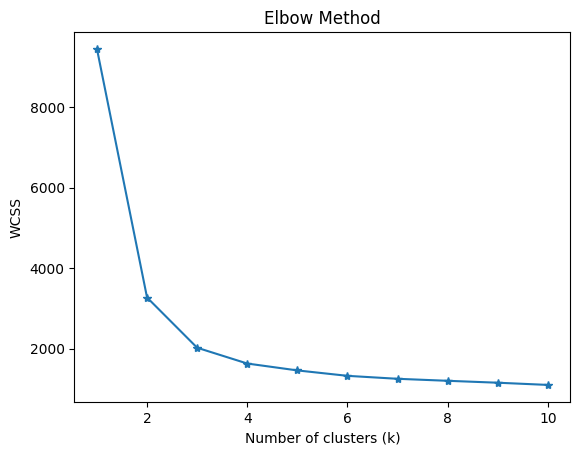

In [169]:

from sklearn.cluster import KMeans


# Select the numerical features for clustering
X = df5.select_dtypes(include=np.number)

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss ,"-*")
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


## Best k value is k=3

In [170]:

# Apply KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df5['Cluster'] = kmeans.fit_predict(X)




In [171]:
df5.head()

,Used it for,Owned for,Ridden for,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money,Model Name,Cluster
0,Daily Commute,Never owned,NaN,3.0,4.0,3.8,2.4,4.0,1.0,TVS iQube,2
1,Everything,> 1 yr,< 5000 kms,3.0,1.0,1.6,1.0,3.0,3.0,TVS iQube,0
2,Daily Commute,< 3 months,< 5000 kms,4.0,4.0,4.4,2.0,5.0,2.0,TVS iQube,2
3,Daily Commute,6 months-1 yr,5000-10000 kms,1.0,1.0,1.4,1.0,1.0,1.0,TVS iQube,0
4,Daily Commute,6 months-1 yr,< 5000 kms,3.0,4.0,3.0,1.0,3.0,2.0,TVS iQube,2


         Visual Appeal  Reliability  Performance  Service Experience  \
Cluster                                                                
0             2.051707     1.206829     1.663683            1.160000   
1             4.779245     4.717610     4.747799            4.675472   
2             3.878025     3.288017     3.620470            2.956959   

          Comfort  Value for Money  
Cluster                             
0        1.805854         1.496585  
1        4.700000         4.536478  
2        3.621478         3.526152  


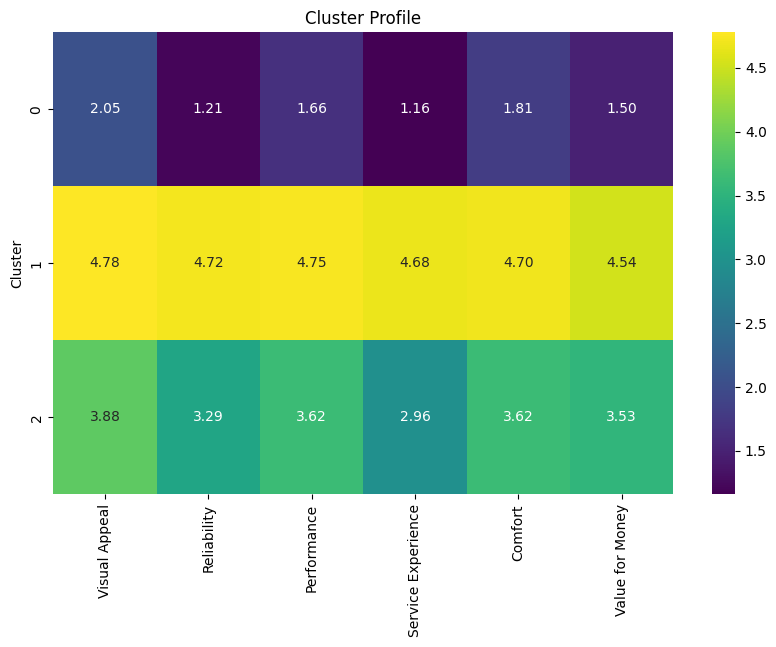

In [172]:
# Group by cluster and calculate the average values for each feature
cluster_profile = df5.groupby('Cluster').agg({
    'Visual Appeal': 'mean',
    'Reliability': 'mean',
    'Performance': 'mean',
    'Service Experience': 'mean',
    'Comfort': 'mean',
    'Value for Money': 'mean'
})

# Display the cluster profile
print(cluster_profile)

# Visualization of the cluster profile using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile, annot=True, cmap='viridis', fmt=".2f")
plt.title('Cluster Profile')
plt.show()


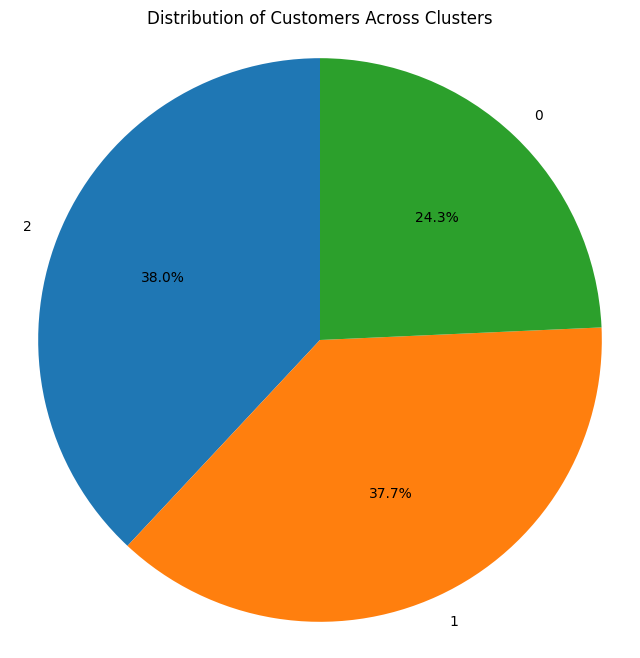

In [173]:
# Count the number of data points in each cluster
cluster_counts = df5['Cluster'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customers Across Clusters')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


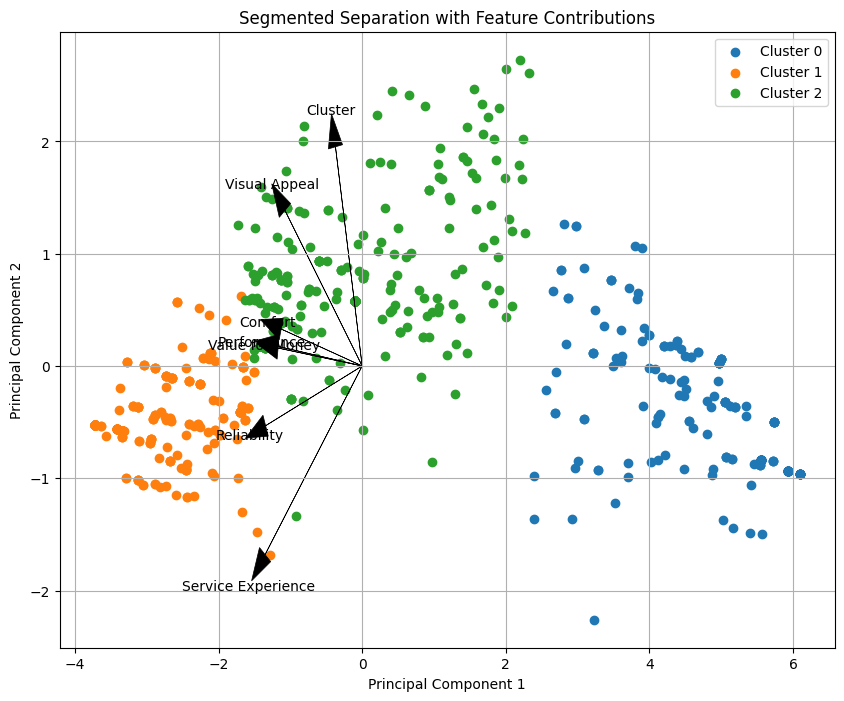

In [174]:

from sklearn.decomposition import PCA

# Select the numerical features for PCA
X = df5.select_dtypes(include=np.number)

# Apply PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Add cluster labels to the principal component dataframe
principalDf['Cluster'] = df5['Cluster']

# Plot the segmented separation
plt.figure(figsize=(10, 8))
for cluster in range(3):
  plt.scatter(principalDf[principalDf['Cluster'] == cluster]['PC1'],
              principalDf[principalDf['Cluster'] == cluster]['PC2'],
              label=f'Cluster {cluster}')

# Calculate the contribution of each feature to the principal components
feature_loadings = pca.components_

# Plot arrows for each feature
for i, feature in enumerate(X.columns):
  plt.arrow(0, 0, feature_loadings[0, i] * 3, feature_loadings[1, i] * 3,
            head_width=0.2, head_length=0.3, linewidth=0.5, color='black')
  plt.text(feature_loadings[0, i] * 3.5, feature_loadings[1, i] * 3.5, feature, ha='center', va='center')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segmented Separation with Feature Contributions')
plt.legend()
plt.grid()
plt.show()


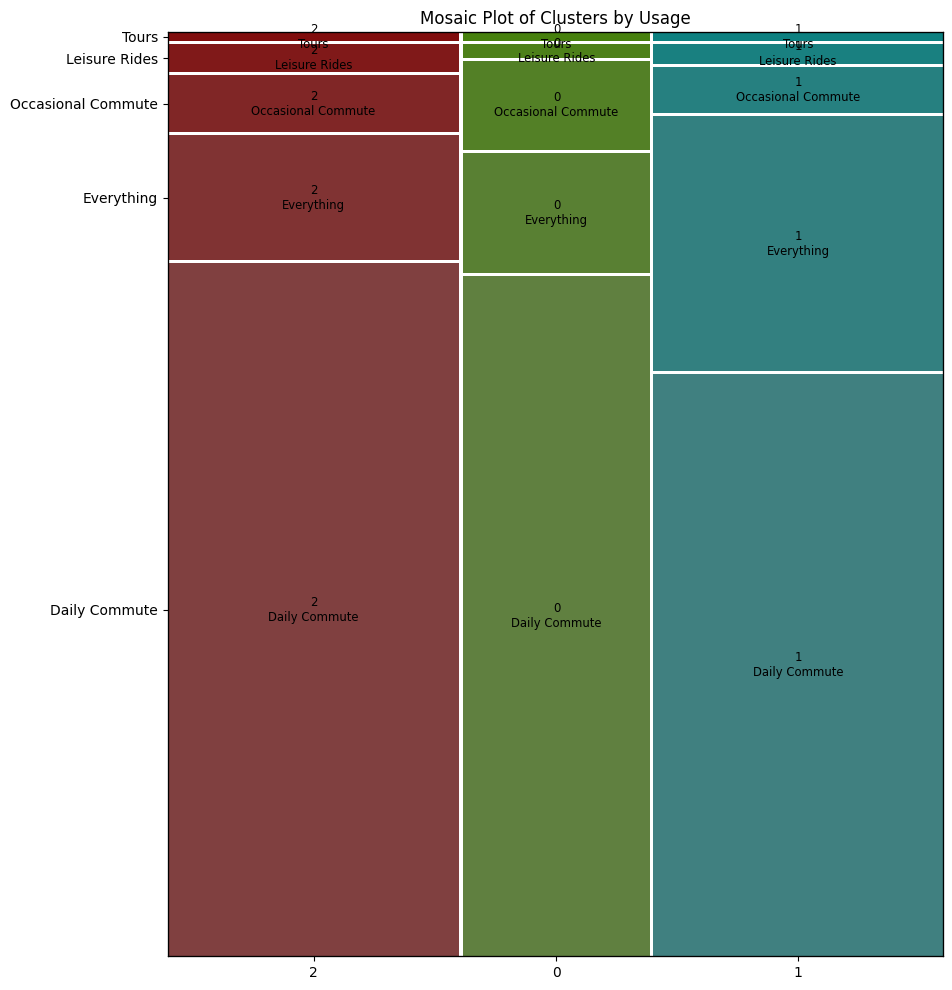

In [175]:
#  mosaic plot for each cluster and the  column "user it for"

import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Create the mosaic plot
fig, ax = plt.subplots(figsize=(10, 12))
mosaic(df5, ['Cluster', 'Used it for'], ax=ax, title='Mosaic Plot of Clusters by Usage')
plt.show()


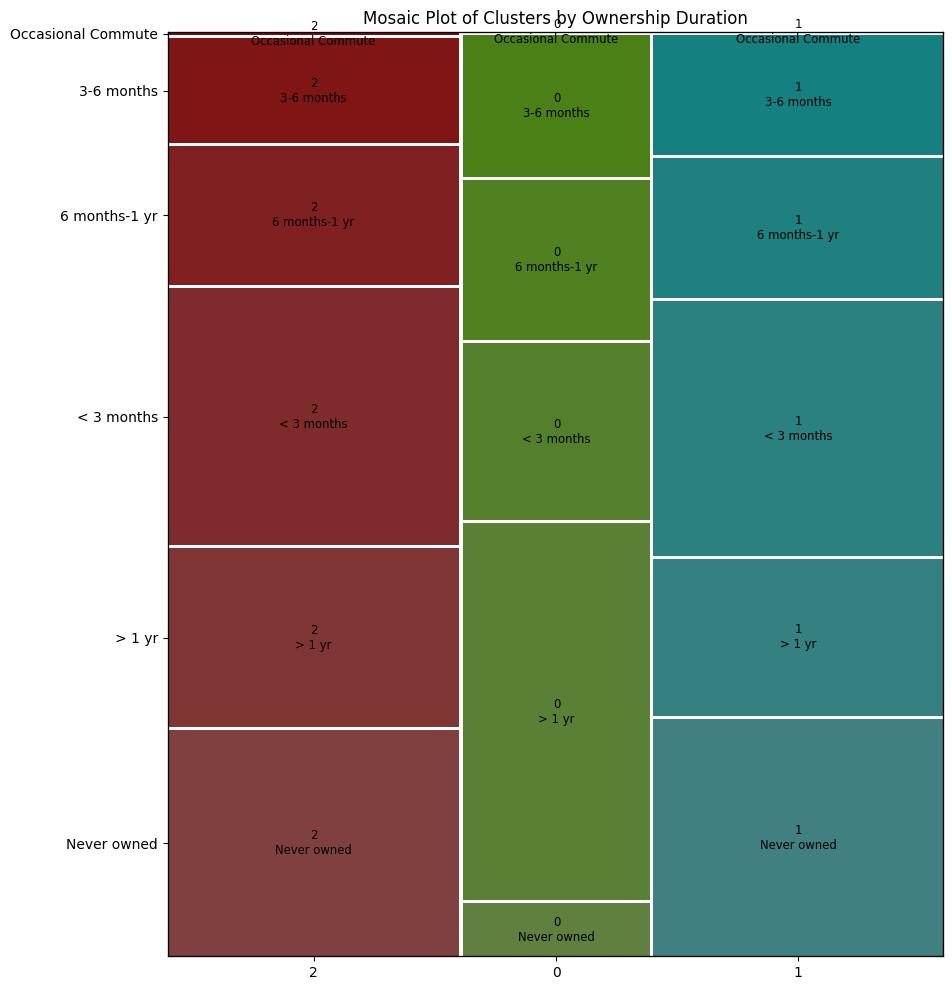

In [176]:
#  mosaic plot for each cluster and the  column "owned for"

# Create the mosaic plot
fig, ax = plt.subplots(figsize=(10, 12))
mosaic(df5, ['Cluster', 'Owned for'], ax=ax, title='Mosaic Plot of Clusters by Ownership Duration')
plt.show()


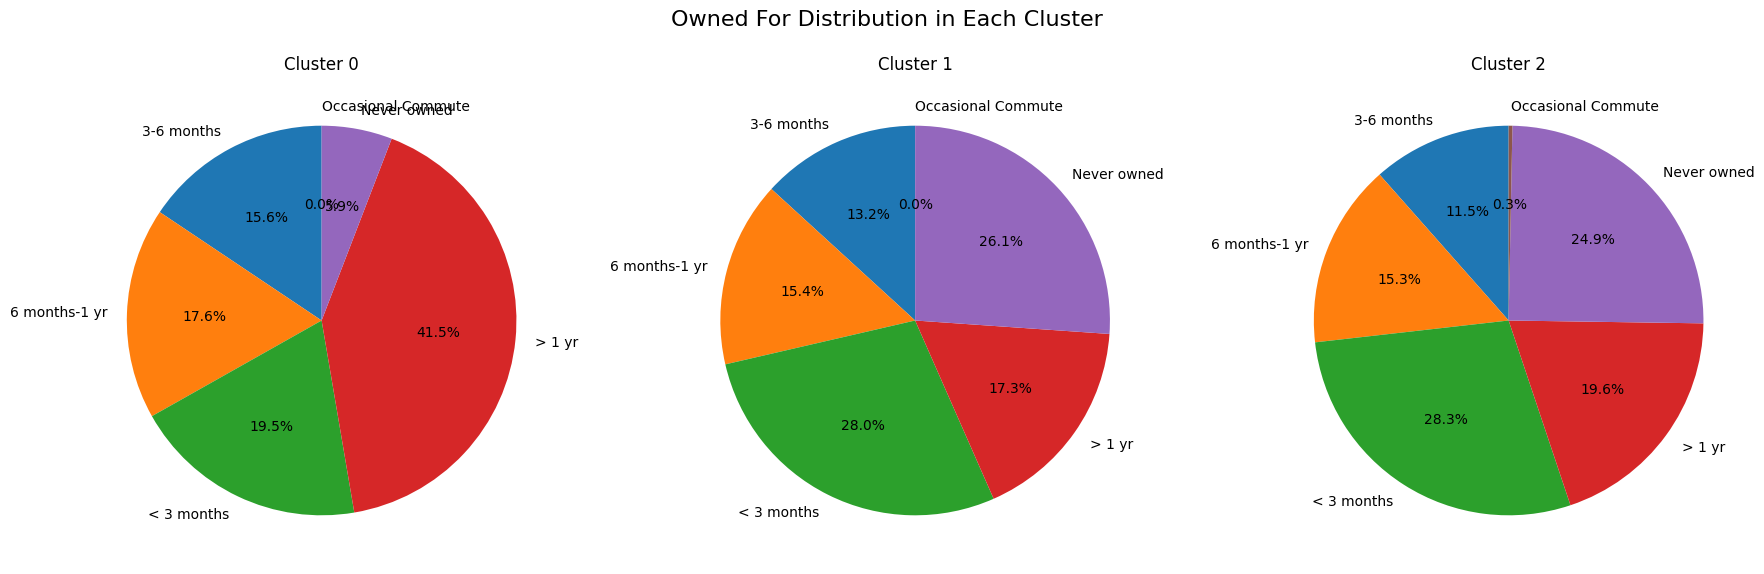

In [177]:
#pie plot for each cluster with the column "owned for "

import matplotlib.pyplot as plt

# Group by cluster and 'Owned for' and count occurrences
owned_for_counts = df5.groupby(['Cluster', 'Owned for'])['Owned for'].count().unstack(fill_value=0)

# Plot pie charts for each cluster
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Owned For Distribution in Each Cluster', fontsize=16)

for i, (cluster, data) in enumerate(owned_for_counts.iterrows()):
  ax = axes[i]
  ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
  ax.set_title(f'Cluster {cluster}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


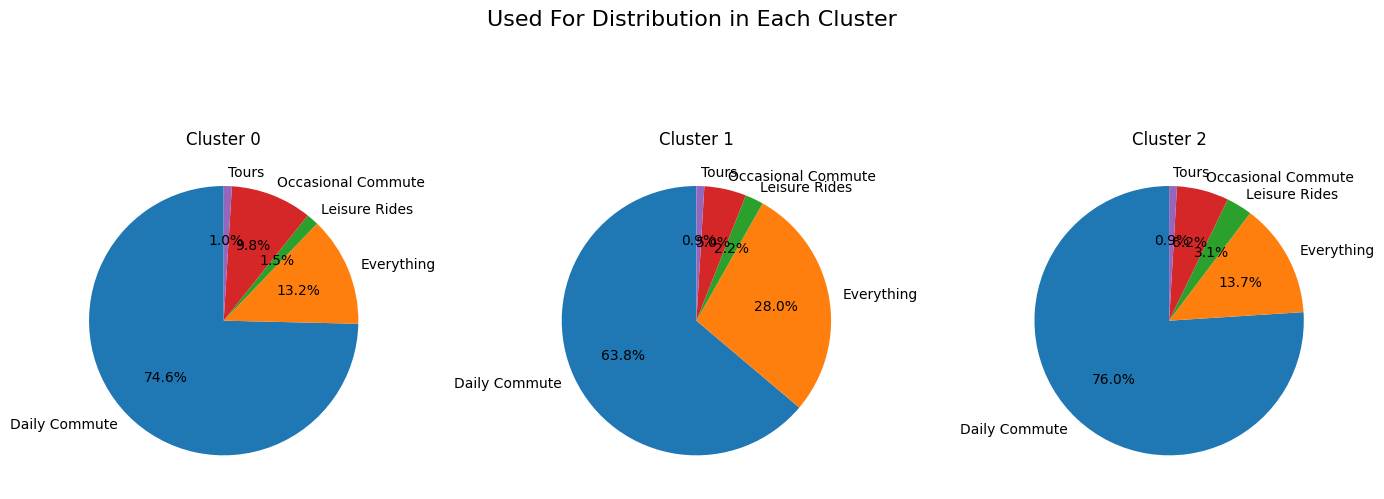

In [178]:
#  pie plot for each cluster with the column "used it for "

# Group by cluster and 'Used it for' and count occurrences
used_for_counts = df5.groupby(['Cluster', 'Used it for'])['Used it for'].count().unstack(fill_value=0)

# Plot pie charts for each cluster
fig, axes = plt.subplots(1, 3, figsize=(14, 6))
fig.suptitle('Used For Distribution in Each Cluster', fontsize=16)

for i, (cluster, data) in enumerate(used_for_counts.iterrows()):
  ax = axes[i]
  ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
  ax.set_title(f'Cluster {cluster}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


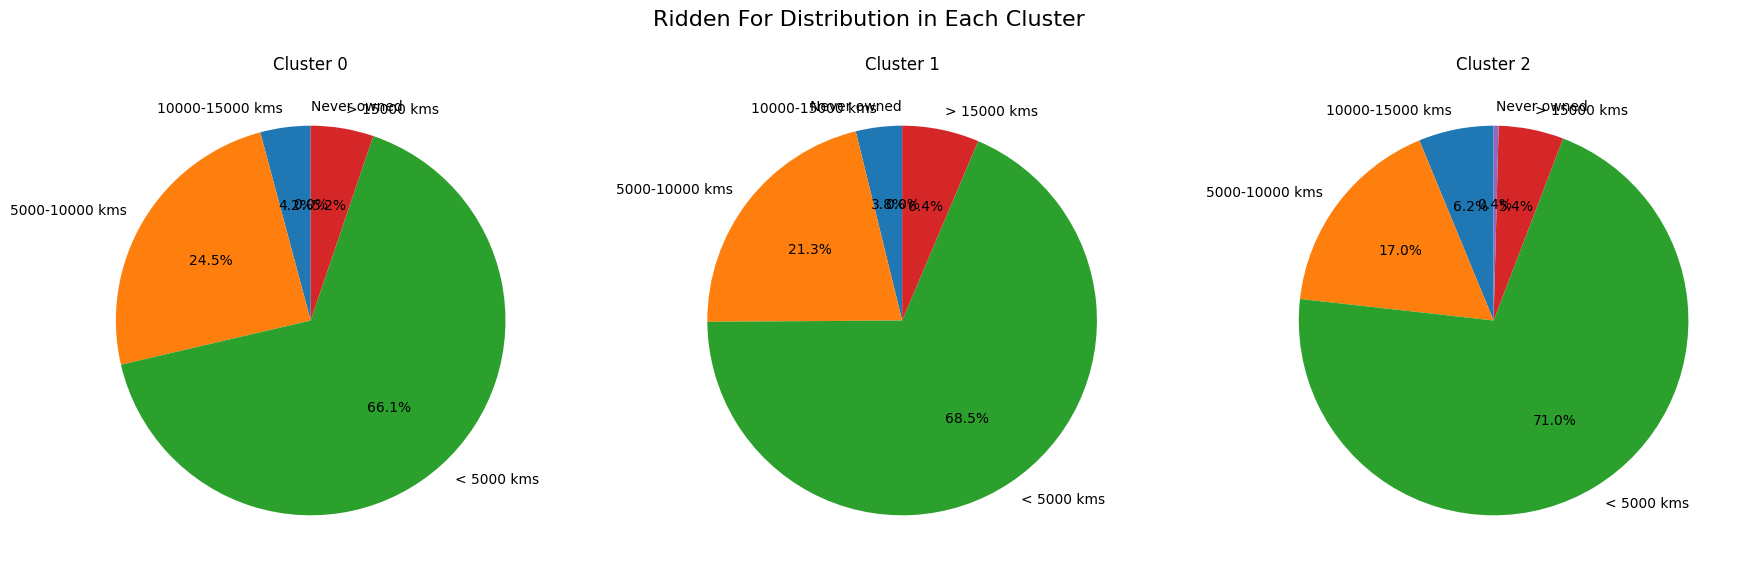

In [181]:
# pie plot for each cluster with the column "Ridden for"

import matplotlib.pyplot as plt

# Group by cluster and 'Ridden for' and count occurrences
ridden_for_counts = df5.groupby(['Cluster', 'Ridden for'])['Ridden for'].count().unstack(fill_value=0)

# Plot pie charts for each cluster
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Ridden For Distribution in Each Cluster', fontsize=16)

for i, (cluster, data) in enumerate(ridden_for_counts.iterrows()):
  ax = axes[i]
  ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
  ax.set_title(f'Cluster {cluster}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [182]:
df5.head(3)

,Used it for,Owned for,Ridden for,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money,Model Name,Cluster
0,Daily Commute,Never owned,NaN,3.0,4.0,3.8,2.4,4.0,1.0,TVS iQube,2
1,Everything,> 1 yr,< 5000 kms,3.0,1.0,1.6,1.0,3.0,3.0,TVS iQube,0
2,Daily Commute,< 3 months,< 5000 kms,4.0,4.0,4.4,2.0,5.0,2.0,TVS iQube,2


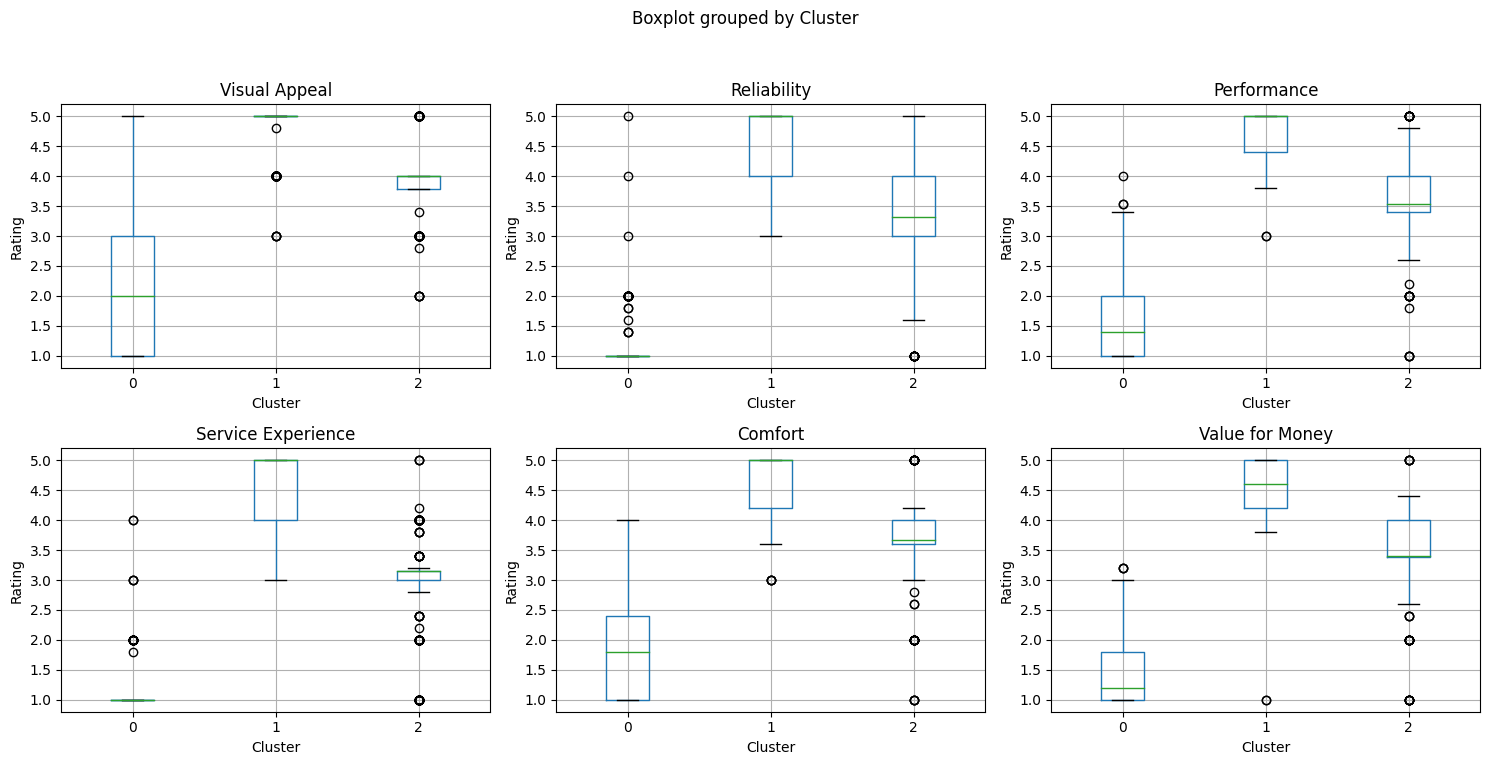

In [183]:
# box plot for each cluster with rating

import matplotlib.pyplot as plt

# Select the rating columns
rating_columns = ['Visual Appeal', 'Reliability', 'Performance', 'Service Experience', 'Comfort', 'Value for Money']

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Box Plots of Ratings by Cluster', fontsize=16)

# Iterate over the rating columns and create box plots
for i, column in enumerate(rating_columns):
  row = i // 3
  col = i % 3
  ax = axes[row, col]
  df5.boxplot(column=column, by='Cluster', ax=ax)
  ax.set_title(column)
  ax.set_xlabel('Cluster')
  ax.set_ylabel('Rating')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [184]:
# Average Rating

# Select the rating columns
rating_columns = ['Visual Appeal', 'Reliability', 'Performance', 'Service Experience', 'Comfort', 'Value for Money']

# Calculate the average rating for each row
df5['Average Rating'] = df5[rating_columns].mean(axis=1)

# Display the updated DataFrame
df5.head()


,Used it for,Owned for,Ridden for,Visual Appeal,Reliability,Performance,Service Experience,Comfort,Value for Money,Model Name,Cluster,Average Rating
0,Daily Commute,Never owned,NaN,3.0,4.0,3.8,2.4,4.0,1.0,TVS iQube,2,3.033333
1,Everything,> 1 yr,< 5000 kms,3.0,1.0,1.6,1.0,3.0,3.0,TVS iQube,0,2.100000
2,Daily Commute,< 3 months,< 5000 kms,4.0,4.0,4.4,2.0,5.0,2.0,TVS iQube,2,3.566667
3,Daily Commute,6 months-1 yr,5000-10000 kms,1.0,1.0,1.4,1.0,1.0,1.0,TVS iQube,0,1.066667
4,Daily Commute,6 months-1 yr,< 5000 kms,3.0,4.0,3.0,1.0,3.0,2.0,TVS iQube,2,2.666667


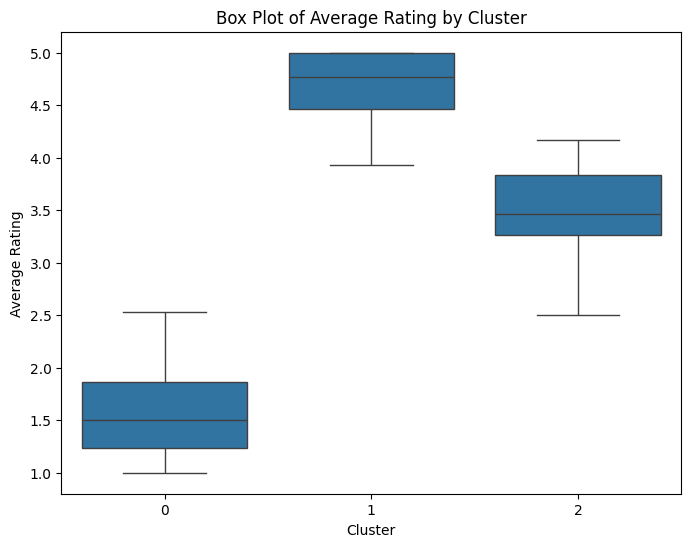

In [185]:
# Box pliot for average rating for each cluster

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Average Rating', data=df5)
plt.title('Box Plot of Average Rating by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Rating')
plt.show()


In [186]:
# Most used models for each cluster  with percetage

def get_top_models(df, cluster_id, top_n=5):
  """
  Calculates the top N most used models within a specific cluster.

  Args:
    df: The DataFrame containing the data.
    cluster_id: The ID of the cluster to analyze.
    top_n: The number of top models to return.

  Returns:
    A DataFrame with the top models, their counts, and percentages.
  """

  cluster_data = df[df['Cluster'] == cluster_id]
  model_counts = cluster_data['Model Name'].value_counts()
  total_count = len(cluster_data)

  top_models = model_counts.head(top_n).reset_index()
  top_models.columns = ['Model Name', 'Count']
  top_models['Percentage'] = (top_models['Count'] / total_count) * 100

  return top_models

# Get the top 5 models for each cluster
for cluster_id in range(3):
  print(f"\nTop Models in Cluster {cluster_id}:")
  top_models = get_top_models(df5, cluster_id)
  print(top_models)



Top Models in Cluster 0:
             Model Name  Count  Percentage
0        Okinawa Praise     34   16.585366
1  Hero Electric Optima     25   12.195122
2   Hero Electric Flash     19    9.268293
3     PURE EV EPluto 7G     18    8.780488
4            Ampere REO     11    5.365854

Top Models in Cluster 1:
             Model Name  Count  Percentage
0   Hero Electric Flash     47   14.779874
1  Hero Electric Optima     32   10.062893
2        Okinawa Praise     26    8.176101
3         Revolt RV 400     21    6.603774
4  Hero Electric Photon     19    5.974843

Top Models in Cluster 2:
             Model Name  Count  Percentage
0   Hero Electric Flash     36   11.214953
1        Okinawa Praise     35   10.903427
2  Hero Electric Optima     25    7.788162
3         Revolt RV 400     22    6.853583
4           Tork Kratos     17    5.295950


In [188]:
df6 = pd.read_csv("new_bikes.csv")
df6.head(15)

,Unnamed: 0,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,0,Ola Electric S1,Ola,Scooter,2.98,181,5.0,85099.0,4.5,116.0,2021.0
1,1,Ola Electric S1 Pro,Ola,Scooter,4.00,181,6.5,120149.0,11.0,116.0,2021.0
2,2,TVS iQube,TVS,Scooter,3.40,75,6.5,117630.0,4.4,78.0,2020.0
3,3,Aura 300 Plus,Ather Energy,Scooter,2.90,116,4.5,129000.0,6.0,80.0,2021.0
4,4,Pure EV Epluto 7G,Pure EV,Scooter,2.70,120,3.0,109000.0,5.0,80.0,2021.0
5,5,Bajaj Chetak Electric,Bajaj Auto,Scooter,4.00,95,5.0,150000.0,4.0,60.0,2020.0
6,6,Okinawa iPraise Pro,Okinawa Autotech,Scooter,2.50,100,3.0,85000.0,3.0,60.0,2021.0
7,7,Hero Electric Opto EV,Hero Motocorp,Scooter,2.20,75,3.0,75000.0,3.0,60.0,2021.0
8,8,Tork T6X,Tork Motors,Bike,6.20,200,5.0,250000.0,25.0,100.0,2021.0
9,9,Revolt RV400,Revolt Motors,Bike,3.20,150,4.0,150000.0,20.0,85.0,2021.0


In [189]:
df6.columns

Index(['Unnamed: 0', 'Model', 'Manufacturer', 'Vehicle Type',
       'Battery Capacity (kWh)', 'Range per Charge (km)', 'Charging Time',
       'Price', 'Power (HP or kW)', 'Top Speed (km/h)', 'Year of Manufacture'],
      dtype='object')

In [190]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              53 non-null     int64  
 1   Model                   53 non-null     object 
 2   Manufacturer            53 non-null     object 
 3   Vehicle Type            53 non-null     object 
 4   Battery Capacity (kWh)  53 non-null     float64
 5   Range per Charge (km)   53 non-null     int64  
 6   Charging Time           52 non-null     float64
 7   Price                   52 non-null     float64
 8   Power (HP or kW)        52 non-null     float64
 9   Top Speed (km/h)        52 non-null     float64
 10  Year of Manufacture     52 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.7+ KB


In [193]:
# Fill null with mean

# Calculate the mean of each numerical column
means = df6.select_dtypes(include=np.number).mean()

# Fill NaN values with the calculated means
df6.fillna(means, inplace=True)

# Display the updated DataFrame
df6.head()


,Unnamed: 0,Model,Manufacturer,Vehicle Type,Battery Capacity (kWh),Range per Charge (km),Charging Time,Price,Power (HP or kW),Top Speed (km/h),Year of Manufacture
0,0,Ola Electric S1,Ola,Scooter,2.98,181,5.0,85099.0,4.5,116.0,2021.0
1,1,Ola Electric S1 Pro,Ola,Scooter,4.00,181,6.5,120149.0,11.0,116.0,2021.0
2,2,TVS iQube,TVS,Scooter,3.40,75,6.5,117630.0,4.4,78.0,2020.0
3,3,Aura 300 Plus,Ather Energy,Scooter,2.90,116,4.5,129000.0,6.0,80.0,2021.0
4,4,Pure EV Epluto 7G,Pure EV,Scooter,2.70,120,3.0,109000.0,5.0,80.0,2021.0


In [192]:
df6.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              53 non-null     int64  
 1   Model                   53 non-null     object 
 2   Manufacturer            53 non-null     object 
 3   Vehicle Type            53 non-null     object 
 4   Battery Capacity (kWh)  53 non-null     float64
 5   Range per Charge (km)   53 non-null     int64  
 6   Charging Time           53 non-null     float64
 7   Price                   53 non-null     float64
 8   Power (HP or kW)        53 non-null     float64
 9   Top Speed (km/h)        53 non-null     float64
 10  Year of Manufacture     53 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.7+ KB


In [195]:

def top_bottom_models(df, column, top_n=5):

  # Sort by the specified column and remove duplicates
  sorted_df = df.sort_values(by=column, ascending=False).drop_duplicates(subset='Model')

  # Get the top and bottom models
  top_models = sorted_df.head(top_n)
  bottom_models = sorted_df.sort_values(by=column, ascending=True).head(top_n)

  return top_models, bottom_models

# Specify the columns to analyze
columns_to_analyze = ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Power (HP or kW)', 'Top Speed (km/h)']

# Get the top 5 models for each column
for column in columns_to_analyze:
  top_models, _ = top_bottom_models(df6, column)
  print(f"\nTop 5 Models by {column}:")
  print(top_models[['Model', column]])

# Get the top and bottom 5 models for 'Charging Time (hours)'
charging_time_column = 'Charging Time'
top_charging, bottom_charging = top_bottom_models(df6, charging_time_column)
print(f"\nTop 5 Models by {charging_time_column}:")
print(top_charging[['Model', charging_time_column]])
print(f"\nBottom 5 Models by {charging_time_column}:")
print(bottom_charging[['Model', charging_time_column]])



Top 5 Models by Battery Capacity (kWh):
                    Model  Battery Capacity (kWh)
21               Tork T6X                     6.2
46   Bajaj Chetak EV Plus                     4.5
22        Bajaj Chetak EV                     4.0
5   Bajaj Chetak Electric                     4.0
48             Ather 500X                     4.0

Top 5 Models by Range per Charge (km):
                   Model  Range per Charge (km)
21              Tork T6X                    200
0        Ola Electric S1                    181
1    Ola Electric S1 Pro                    181
46  Bajaj Chetak EV Plus                    160
40          Revolt RV400                    150

Top 5 Models by Power (HP or kW):
                  Model  Power (HP or kW)
15             Tork T6X         25.000000
40         Revolt RV400         21.000000
1   Ola Electric S1 Pro         11.000000
48           Ather 500X          7.000000
52           Ampere Zeo          6.786538

Top 5 Models by Top Speed (km/h):
         

In [196]:

from sklearn.neighbors import NearestNeighbors

# Select the features for similarity calculation
features = ['Battery Capacity (kWh)', 'Range per Charge (km)', 'Power (HP or kW)', 'Top Speed (km/h)', 'Charging Time']

# Extract the features for all models
X = df6[features]

# Find the index of the Ola Electric S1 Pro model
target_model_index = df6[df6['Model'] == 'Ola Electric S1 Pro'].index[0]

# Create a KNN model with k=6 (including the target model itself)
knn = NearestNeighbors(n_neighbors=6, metric='euclidean')
knn.fit(X)

# Find the nearest neighbors for the target model
distances, indices = knn.kneighbors(X.iloc[[target_model_index]])

# Get the indices of the nearest neighbors (excluding the target model)
similar_model_indices = indices[0][1:]

# Get the names of the similar models
similar_models = df6.iloc[similar_model_indices]['Model'].unique()[:5]  # Get unique 5 models

# Print the similar models
print("Models similar to Ola Electric S1 Pro:")
print(similar_models)


Models similar to Ola Electric S1 Pro:
['Ola Electric S1' 'Tork T6X' 'Bajaj Chetak EV Plus']
